In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_performance_boxplots(skf: dict, pbkf: dict):
    """Dict: keys --> filter, values --> filename"""
    
    # Parse results
    skf_list = []
    for key, filename in skf.items():
        df = pd.read_csv(filename, sep = ";")
        df["filter"] = key
        skf_list.append(df)

    pbkf_list = []
    for key, filename in pbkf.items():
        df = pd.read_csv(filename, sep = ";")
        df["filter"] = key
        pbkf_list.append(df)
        

    total_skf = pd.concat(skf_list)
    total_pbkf = pd.concat(pbkf_list)
    
    # Generate boxplots
    fig, ax = plt.subplots(1,2, figsize = (25,8))

    ax[0].set_title("Whole Project split", fontsize = 16)
    ax[1].set_title("StratifiedKfold", fontsize = 16)

    ax[0].set_ylim(-0.05,1.05)
    ax[1].set_ylim(-0.05,1.05)

    sns.boxplot(data= total_pbkf, x="model", y = "pxd_f1", hue = "filter", ax = ax[0])
    sns.boxplot(data= total_skf, x="model", y = "pxd_f1", hue = "filter", ax = ax[1])


local filtering

In [9]:
basel_pbkf = pd.read_csv("comparison_base_pbkf.csv", sep = ";")
f25l_pbkf = pd.read_csv("comparison_f25_local_pbkf.csv", sep = ";")
f50l_pbkf = pd.read_csv("comparison_f50_local_pbkf.csv", sep = ";")
f75l_pbkf = pd.read_csv("comparison_f75_local_pbkf.csv", sep = ";")

basel_skf = pd.read_csv("comparison_base_skf.csv", sep = ";")
f25l_skf = pd.read_csv("comparison_f25_local_skf.csv", sep = ";")
f50l_skf = pd.read_csv("comparison_f50_local_skf.csv", sep = ";")
f75l_skf = pd.read_csv("comparison_f75_local_skf.csv", sep = ";")

In [10]:
basel_pbkf["filter"] = "base"
f25l_pbkf["filter"] = "f25"
f50l_pbkf["filter"] = "f50"
f75l_pbkf["filter"] = "f75"

basel_skf["filter"] = "base"
f25l_skf["filter"] = "f25"
f50l_skf["filter"] = "f50"
f75l_skf["filter"] = "f75"

In [11]:
pbkf_total_l = pd.concat([basel_pbkf, f25l_pbkf, f50l_pbkf, f75l_pbkf])

skf_total_l = pd.concat([basel_skf, f25l_skf, f50l_skf, f75l_skf])

Global filtering

In [12]:
baseg_pbkf = pd.read_csv("comparison_base_pbkf.csv", sep = ";")
f25g_pbkf = pd.read_csv("comparison_f25_global_pbkf.csv", sep = ";")
f50g_pbkf = pd.read_csv("comparison_f50_global_pbkf.csv", sep = ";")
f75g_pbkf = pd.read_csv("comparison_f75_global_pbkf.csv", sep = ";")
f50shuffled_pbkf = pd.read_csv("comparison_f50shuffle_global_pbkf.csv", sep = ";")
f50train_pbkf = pd.read_csv("comparison_train_f50_pbkf.csv", sep = ";")
f50_scaled_pbkf = pd.read_csv("comparison_f50_global_pbkf_scaled.csv", sep = ";")

baseg_skf = pd.read_csv("comparison_base_skf.csv", sep = ";")
f25g_skf = pd.read_csv("comparison_f25_global_skf.csv", sep = ";")
f50g_skf = pd.read_csv("comparison_f50_global_skf.csv", sep = ";")
f75g_skf = pd.read_csv("comparison_f75_global_skf.csv", sep = ";")
f50shuffled_skf = pd.read_csv("comparison_f50shuffle_global_skf.csv", sep = ";")
f50train_skf = pd.read_csv("comparison_train_f50_skf.csv", sep = ";")

In [13]:
baseg_pbkf["filter"] = "base"
f25g_pbkf["filter"] = "f25"
f50g_pbkf["filter"] = "f50"
f75g_pbkf["filter"] = "f75"
f50shuffled_pbkf["filter"] = "shuffled"
f50train_pbkf["filter"] = "train_filter"
f50_scaled_pbkf["filter"] = "scaled"

baseg_skf["filter"] = "base"
f25g_skf["filter"] = "f25"
f50g_skf["filter"] = "f50"
f75g_skf["filter"] = "f75"
f50shuffled_skf["filter"] = "shuffled"
f50train_skf["filter"] = "train_filter"

In [14]:
pbkf_total_g = pd.concat([baseg_pbkf, f25g_pbkf, f50g_pbkf, f75g_pbkf, f50shuffled_pbkf, f50train_pbkf, f50_scaled_pbkf])

skf_total_g = pd.concat([baseg_skf, f25g_skf, f50g_skf, f75g_skf, f50shuffled_skf, f50train_skf])

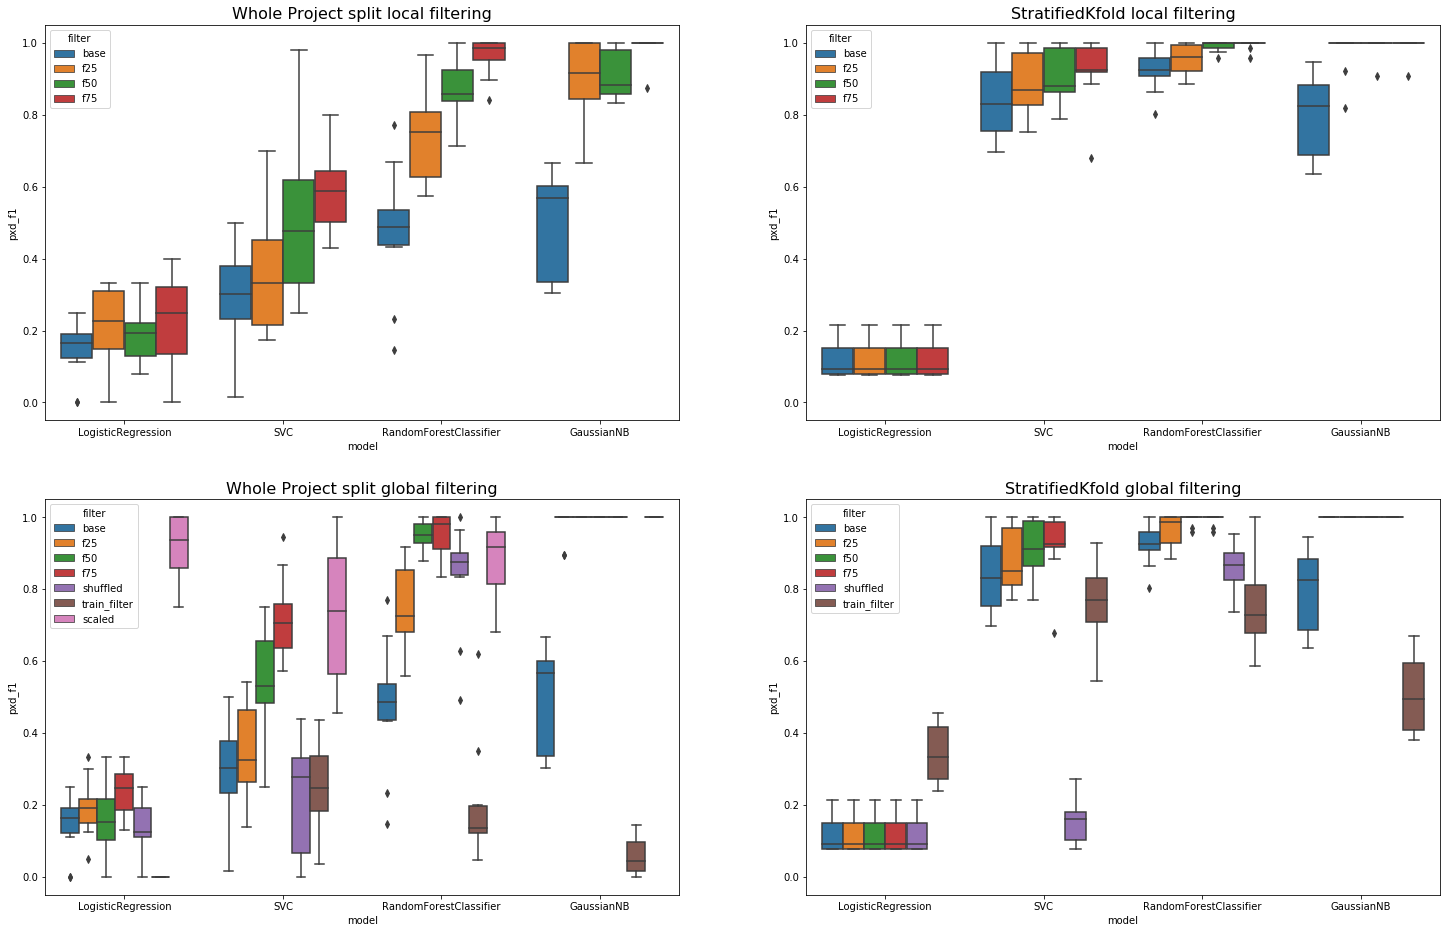

In [20]:
fig, ax = plt.subplots(2,2, figsize = (25,16))

ax[0,0].set_title("Whole Project split local filtering", fontsize = 16)
ax[0,1].set_title("StratifiedKfold local filtering", fontsize = 16)
ax[1,0].set_title("Whole Project split global filtering", fontsize = 16)
ax[1,1].set_title("StratifiedKfold global filtering", fontsize = 16)

ax[0,0].set_ylim(-0.05,1.05)
ax[1,0].set_ylim(-0.05,1.05)
ax[0,1].set_ylim(-0.05,1.05)
ax[1,1].set_ylim(-0.05,1.05)

sns.boxplot(data= pbkf_total_l, x="model", y = "pxd_f1", hue = "filter", ax = ax[0,0])
sns.boxplot(data= skf_total_l, x="model", y = "pxd_f1", hue = "filter", ax = ax[0,1])
sns.boxplot(data= pbkf_total_g, x="model", y = "pxd_f1", hue = "filter", ax = ax[1,0])
sns.boxplot(data= skf_total_g, x="model", y = "pxd_f1", hue = "filter", ax = ax[1,1])

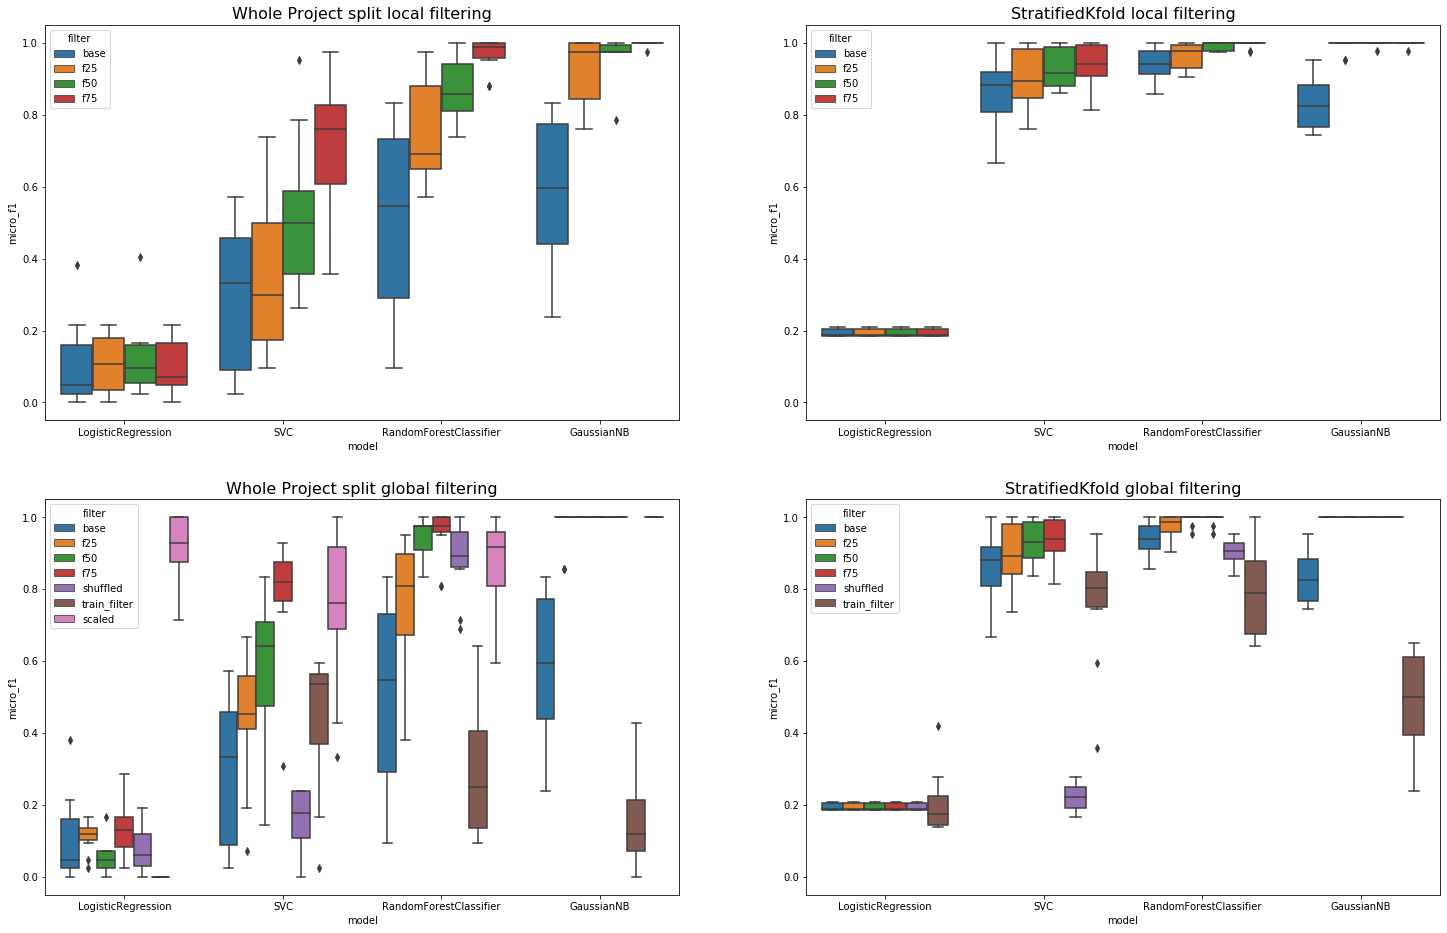

In [21]:
fig, ax = plt.subplots(2,2, figsize = (25,16))

ax[0,0].set_ylim(-0.05,1.05)
ax[1,0].set_ylim(-0.05,1.05)
ax[0,1].set_ylim(-0.05,1.05)
ax[1,1].set_ylim(-0.05,1.05)

ax[0,0].set_title("Whole Project split local filtering", fontsize = 16)
sns.boxplot(data= pbkf_total_l, x="model", y = "micro_f1", hue = "filter", ax = ax[0,0])

ax[0,1].set_title("StratifiedKfold local filtering", fontsize = 16)
sns.boxplot(data= skf_total_l, x="model", y = "micro_f1", hue = "filter", ax = ax[0,1])

ax[1,0].set_title("Whole Project split global filtering", fontsize = 16)
sns.boxplot(data= pbkf_total_g, x="model", y = "micro_f1", hue = "filter", ax = ax[1,0])

ax[1,1].set_title("StratifiedKfold global filtering", fontsize = 16)
sns.boxplot(data= skf_total_g, x="model", y = "micro_f1", hue = "filter", ax = ax[1,1])

Guassian Naive Bayes seems to perform very well on the filtered dataset, yet also on the shuffled dataset which indicates large bias <br>
Support vector machines seems to be the only algorith mto be pretty robust against the class filtering bias

### Scaled datasets

In [5]:
bases_pbkf = pd.read_csv("comparison_base_pbkf_scaled.csv", sep = ";")
f25gs_pbkf = pd.read_csv("comparison_f25_global_pbkf_scaled.csv", sep = ";")
f50gs_pbkf = pd.read_csv("comparison_f50_global_pbkf_scaled.csv", sep = ";")
f75gs_pbkf = pd.read_csv("comparison_f75_global_pbkf_scaled.csv", sep = ";")
shuffled_s_pbkf = pd.read_csv("comparison_f50shuffle_global_pbkf_scaled.csv", sep = ";")

bases_skf = pd.read_csv("comparison_base_skf_scaled.csv", sep = ";")
f25gs_skf = pd.read_csv("comparison_f25_global_skf_scaled.csv", sep = ";")
f50gs_skf = pd.read_csv("comparison_f50_global_skf_scaled.csv", sep = ";")
f75gs_skf = pd.read_csv("comparison_f75_global_skf_scaled.csv", sep = ";")
shuffled_s_skf = pd.read_csv("comparison_f50shuffle_global_skf_scaled.csv", sep = ";")

In [4]:
basens_pbkf = pd.read_csv("comparison_base_pbkf_nscaled.csv", sep = ";")
f25gns_pbkf = pd.read_csv("comparison_f25_global_pbkf_nscaled.csv", sep = ";")
f50gns_pbkf = pd.read_csv("comparison_f50_global_pbkf_nscaled.csv", sep = ";")
f75gns_pbkf = pd.read_csv("comparison_f75_global_pbkf_nscaled.csv", sep = ";")
shuffled_ns_pbkf = pd.read_csv("comparison_f50shuffle_global_pbkf_nscaled.csv", sep = ";")

basens_skf = pd.read_csv("comparison_base_skf_nscaled.csv", sep = ";")
f25gns_skf = pd.read_csv("comparison_f25_global_skf_nscaled.csv", sep = ";")
f50gns_skf = pd.read_csv("comparison_f50_global_skf_nscaled.csv", sep = ";")
f75gns_skf = pd.read_csv("comparison_f75_global_skf_nscaled.csv", sep = ";")
shuffled_ns_skf = pd.read_csv("comparison_f50shuffle_global_skf_nscaled.csv", sep = ";")

In [6]:
bases_pbkf["filter"] = "base"
f25gs_pbkf["filter"] = "f25"
f50gs_pbkf["filter"] = "f50"
f75gs_pbkf["filter"] = "f75"
shuffled_s_pbkf["filter"] = "shuffled"

bases_skf["filter"] = "base"
f25gs_skf["filter"] = "f25"
f50gs_skf["filter"] = "f50"
f75gs_skf["filter"] = "f75"
shuffled_s_skf["filter"] = "shuffled"

basens_pbkf["filter"] = "base"
f25gns_pbkf["filter"] = "f25"
f50gns_pbkf["filter"] = "f50"
f75gns_pbkf["filter"] = "f75"
shuffled_ns_pbkf["filter"] = "shuffled"

basens_skf["filter"] = "base"
f25gns_skf["filter"] = "f25"
f50gns_skf["filter"] = "f50"
f75gns_skf["filter"] = "f75"
shuffled_ns_skf["filter"] = "shuffled"

In [7]:
scaled_pbkf = pd.concat([bases_pbkf, f25gs_pbkf, f50gs_pbkf, f75gs_pbkf, shuffled_s_pbkf])
not_scaled_pbkf = pd.concat([basens_pbkf, f25gns_pbkf, f50gns_pbkf, f75gns_pbkf, shuffled_ns_pbkf])
scaled_skf = pd.concat([bases_skf, f25gs_skf, f50gs_skf, f75gs_skf, shuffled_s_skf])
not_scaled_skf = pd.concat([basens_skf, f25gns_skf, f50gns_skf, f75gns_skf, shuffled_ns_skf])

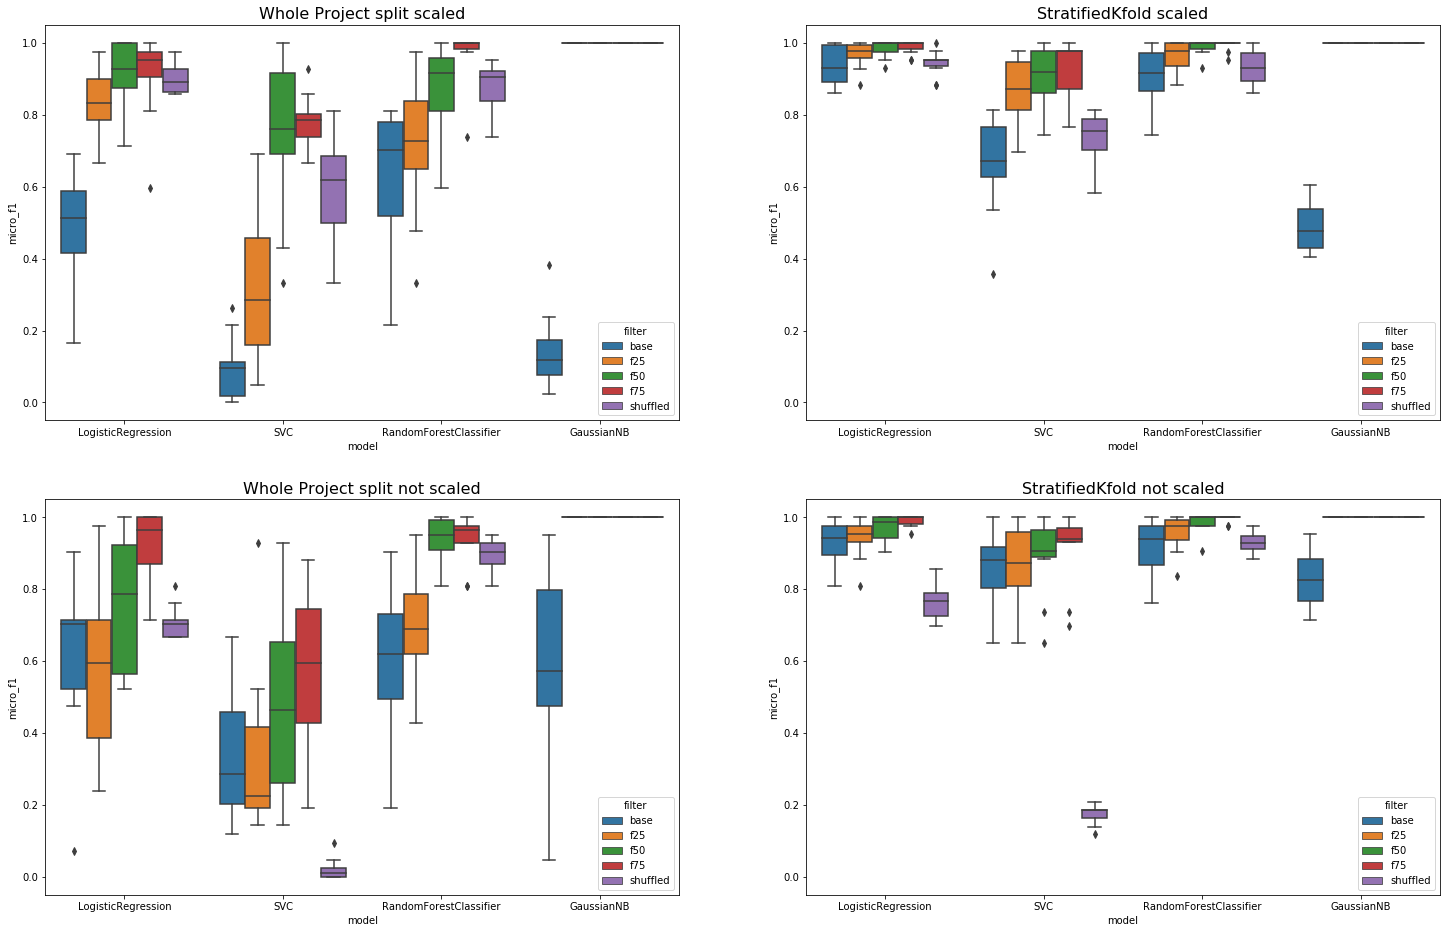

In [9]:
fig, ax = plt.subplots(2,2, figsize = (25,16))

ax[0,0].set_ylim(-0.05,1.05)
ax[1,0].set_ylim(-0.05,1.05)
ax[0,1].set_ylim(-0.05,1.05)
ax[1,1].set_ylim(-0.05,1.05)

ax[0,0].set_title("Whole Project split scaled", fontsize = 16)
sns.boxplot(data= scaled_pbkf, x="model", y = "micro_f1", hue = "filter", ax = ax[0,0])

ax[0,1].set_title("StratifiedKfold scaled", fontsize = 16)
sns.boxplot(data= scaled_skf, x="model", y = "micro_f1", hue = "filter", ax = ax[0,1])

ax[1,0].set_title("Whole Project split not scaled", fontsize = 16)
sns.boxplot(data= not_scaled_pbkf, x="model", y = "micro_f1", hue = "filter", ax = ax[1,0])

ax[1,1].set_title("StratifiedKfold not scaled", fontsize = 16)
sns.boxplot(data= not_scaled_skf, x="model", y = "micro_f1", hue = "filter", ax = ax[1,1])

---

## Rank based dataset classification performance

In [3]:
pbkf = ["comparison_rankbased_base_pbkf.csv",
"comparison_rankbased_f25_pbkf.csv",
"comparison_rankbased_f50_pbkf.csv",
"comparison_rankbased_f75_pbkf.csv",
"comparison_rankbased_shuffle_pbkf.csv",]

skf = ["comparison_rankbased_base_skf.csv",
"comparison_rankbased_f25_skf.csv",
"comparison_rankbased_f50_skf.csv",
"comparison_rankbased_f75_skf.csv",
"comparison_rankbased_shuffle_skf.csv",]

keys = "base f25 f50 f75 shuffle".split()

skf = {keys[i]: skf[i] for i in range(5)}
pbkf = {keys[i]: pbkf[i] for i in range(5)}

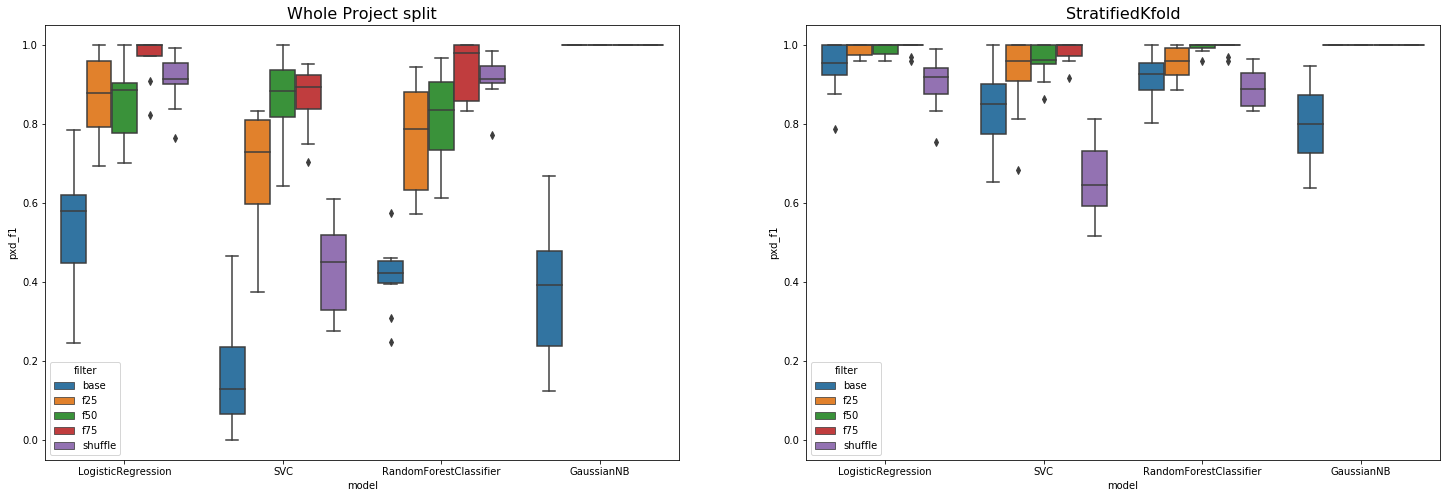

In [4]:
generate_performance_boxplots(skf = skf, pbkf = pbkf)

---

## Binarized dataset classification performance

In [43]:
skf = ["comparison_bool_base_skf.csv", "comparison_bool_f25_skf.csv", "comparison_bool_f50_skf.csv", "comparison_bool_f75_skf.csv", "comparison_bool_shuffle_skf.csv"]
pbkf = ["comparison_bool_base_pbkf.csv", "comparison_bool_f25_pbkf.csv", "comparison_bool_f50_pbkf.csv", "comparison_bool_f75_pbkf.csv", "comparison_bool_shuffle_pbkf.csv"]

keys = "base f25 f50 f75 shuffle".split()

skf = {keys[i]: skf[i] for i in range(5)}
pbkf = {keys[i]: pbkf[i] for i in range(5)}

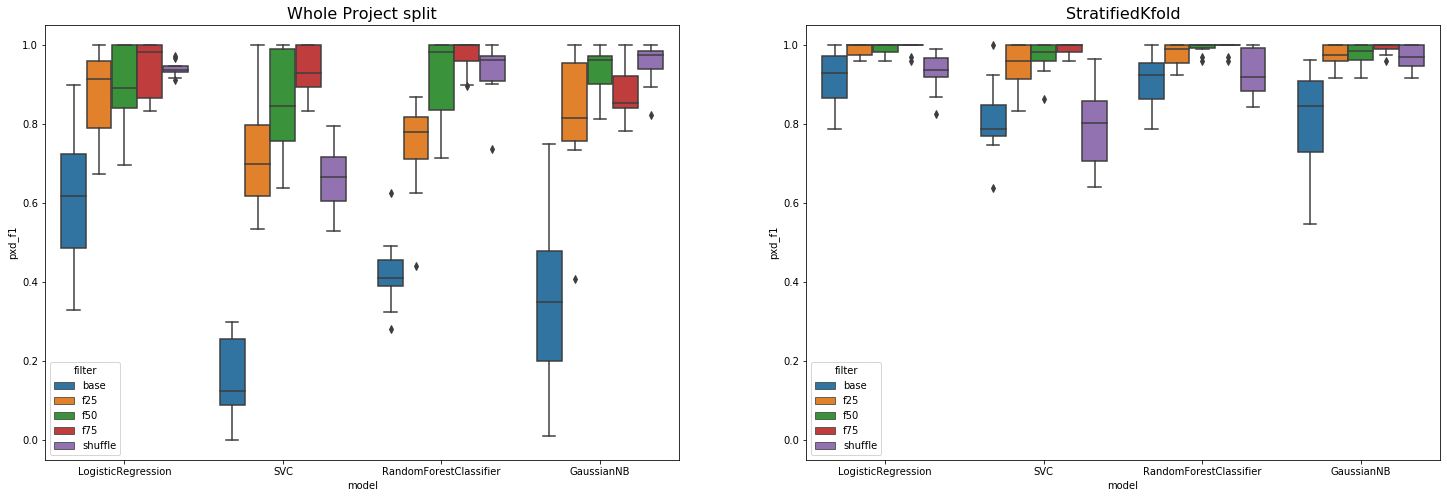

In [44]:
generate_performance_boxplots(skf = skf, pbkf = pbkf)

Extensive overfitting upon binarized dataset

---

## Rescaling every sample to the same variance and mean

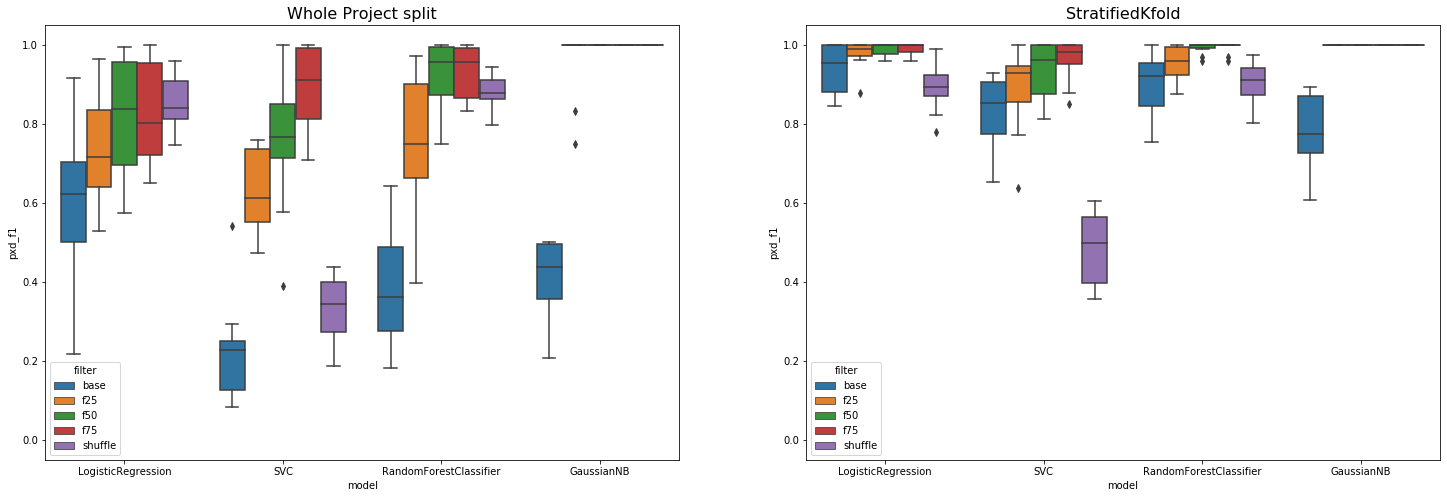

In [5]:
skf = ["comparison_rescaled_base_skf.csv", "comparison_rescaled_f25_skf.csv", "comparison_rescaled_f50_skf.csv", "comparison_rescaled_f75_skf.csv", "comparison_rescaled_shuffle_skf.csv"]
pbkf = ["comparison_rescaled_base_pbkf.csv", "comparison_rescaled_f25_pbkf.csv", "comparison_rescaled_f50_pbkf.csv", "comparison_rescaled_f75_pbkf.csv", "comparison_rescaled_shuffle_pbkf.csv"]

keys = "base f25 f50 f75 shuffle".split()

skf = {keys[i]: skf[i] for i in range(5)}
pbkf = {keys[i]: pbkf[i] for i in range(5)}
generate_performance_boxplots(skf = skf, pbkf = pbkf)

---

## Model performance on pathway features

In [50]:
skf = ["comparison_pathway_skf.csv", "comparison_pathway_skf_shuffle.csv"]
pbkf = ["comparison_pathway_pbkf.csv", "comparison_pathway_pbkf_shuffle.csv"]

keys = "base shuffle".split()

skf = {keys[i]: skf[i] for i in range(2)}
pbkf = {keys[i]: pbkf[i] for i in range(2)}

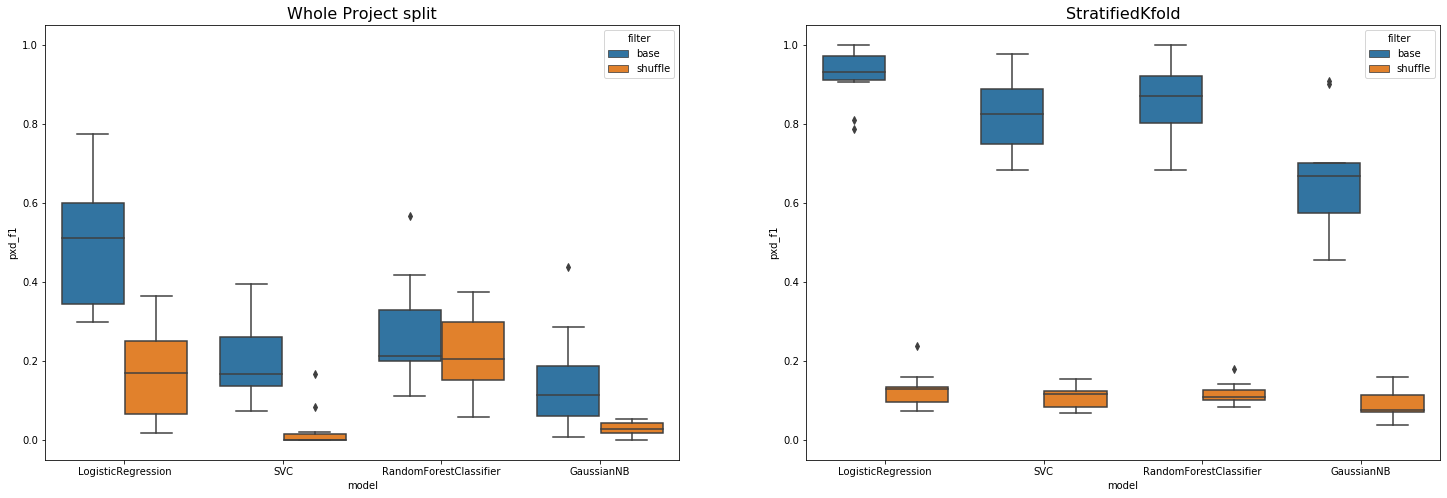

In [51]:
generate_performance_boxplots(skf = skf, pbkf = pbkf)

A simple logistic regression seems to perform best on pathway features

### After hyperparameter tuning

In [4]:
hyper_path = pd.read_csv("gs_pathway.csv", sep = ";")

["<bound method BaseEstimator.get_params of LogisticRegression(C=5.0, class_weight='balanced')>"
 "<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight={'blood': 0.5706666666666667,\n                                     'brain': 0.6793650793650794,\n                                     'breast': 0.5156626506024097,\n                                     'cervix': 0.9106382978723404,\n                                     'colon': 1.646153846153846, 'kidney': 2.14,\n                                     'liver': 3.890909090909091,\n                                     'ovary': 0.8734693877551021,\n                                     'skin': 1.646153846153846,\n                                     'umbilical vein': 1.5285714285714285},\n                       n_estimators=200)>"
 '<bound method BaseEstimator.get_params of GaussianNB(var_smoothing=1e-15)>']


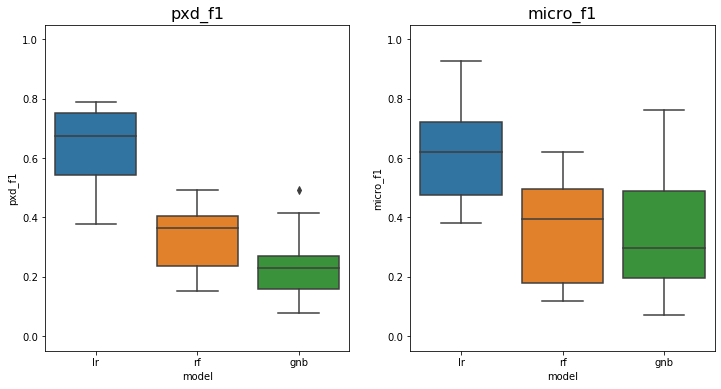

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].set_ylim(-0.05,1.05)
ax[1].set_ylim(-0.05,1.05)

ax[0].set_title("pxd_f1", fontsize = 16)
sns.boxplot(data= hyper_path, x="model", y = "pxd_f1", ax = ax[0])

ax[1].set_title("micro_f1", fontsize = 16)
sns.boxplot(data= hyper_path, x="model", y = "micro_f1", ax = ax[1])

print(hyper_path.parameters.unique())

In [3]:
hyper_path_pbskf = pd.read_csv("gs_pathway_lr.csv", sep = ";")
hyper_path_skf = pd.read_csv("gs_pathway_lr_skf.csv", sep = ";")

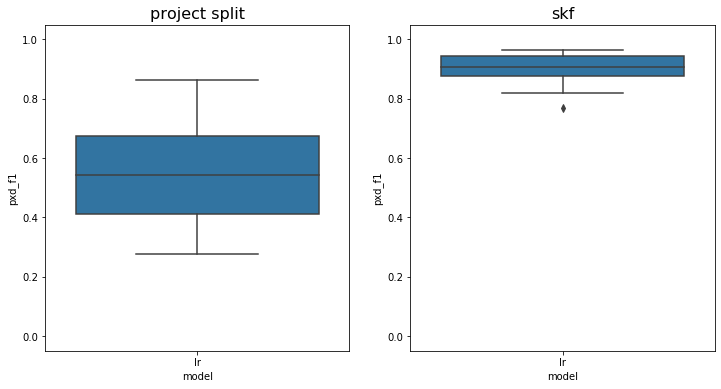

In [6]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].set_ylim(-0.05,1.05)
ax[1].set_ylim(-0.05,1.05)

ax[0].set_title("project split", fontsize = 16)
sns.boxplot(data= hyper_path_pbskf, x="model", y = "pxd_f1", ax = ax[0])

ax[1].set_title("skf", fontsize = 16)
sns.boxplot(data= hyper_path_skf, x="model", y = "pxd_f1", ax = ax[1])
